# Project 1: Write a Data Scientist Blog Post
_by Daniela Yassuda Yamashita_

This Jupyter notebook analyses the StackOverflow data from 2011 to 2020 to indentify some tendencies in software developper career in the last years. The main objective of this analysis is to extract key information that would help people to orient their careers toward a field that would be both well-paied and well-accepted in the current job market. Following the [CRISDM](https://paginas.fe.up.pt/~ec/files_0405/slides/02%20CRISP.pdf) (_Cross Industry Standard Process for Data Mining_) process, the objective of this analysis is to identify some valuable recommendations to start programming. 

Therefore, this analysis is divided into five sections. First, in **Business understanding** section, a preliminary analysis is conducted aiming at identifying three relevant aspects that is interesting to know before striving for learning a new programming skill. Subsequently, in **Data understanding** section, some statistics of the Stackoverflow database will be provided in order to help us to better interpret it. Afterwards, in **Data preparation** section it will be defined some functions to clean the data. The section, **Analysing results** will show some results obtained. Finally, the main conclusions drawn from this analysis will be discussed in **Conclusion**.

Ramarkably, since this analysis does not require the development of any machine learning model, the _Modeling_ and _Evaluation_ phase of CRISDM process were not implemented.



## 1. Business understanding


Aiming to understand both the business and the dataset of StackOverflow of last years, this section provides a brief look into the data structure. The main objective of this preliminary analysis is to recognise common information of the 10-years dataset that would be valuable to answer three business question to give some directives in which programming language is worth to learn.

### 1.1 First look at the data
As first step, the Python libraries used to tackle this problem is imported into the Jupiter Notebook. Since this analysis require the data treatment of multiple dataset, the data available in the [StackOverflow database](https://insights.stackoverflow.com/survey) are read one at a time from csv files saved in the folder _./Dataset_. To implement it, the variables _PathName_ and _FileNames_ refering to the location of csv files are created.

In [1]:
#---------------
# Import libraries
#---------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#------------------
# CSV file location
#------------------
PathName = "./Dataset/"
FileNames = ["2011 Stack Overflow Survey Results",
             "2012 Stack Overflow Survey Results",
             "2013 Stack Overflow Survey Responses",
             "2014 Stack Overflow Survey Responses",
             "2015 Stack Overflow Developer Survey Responses",
             "2016 Stack Overflow Survey Responses",
             "survey_results_public_2017",
             "survey_results_public_2018",
            "survey_results_public_2019",
            "survey_results_public_2020"]

#----------------------------------------------------------
# Read CSV files and visualise the data structe of each one
#----------------------------------------------------------
years = np.linspace(2011,2020,2020-2011+1,dtype = 'int') # List with all the years under analysis
for year in years:
    idx =  year - 2011;
    print('------------------------------------------------------------------------')
    print('Year ' + str(year))
    print("Reading csv file ': " + PathName  + FileNames[idx] + '.csv ...')
    
    # Read CSV and save the data into a Pandas Dataframe
    df = pd.read_csv(PathName  + FileNames[idx] + '.csv',engine='python') 
    
    # Show the type of data (column headers)
    print(df.columns)



------------------------------------------------------------------------
Year 2011
Reading csv file ': ./Dataset/2011 Stack Overflow Survey Results.csv ...
Index(['What Country or Region do you live in?',
       'Which US State or Territory do you live in?', 'How old are you?',
       'How many years of IT/Programming experience do you have?',
       'How would you best describe the industry you work in?',
       'Which best describes the size of your company?',
       'Which of the following best describes your occupation?',
       'How likely is it that a recommendation you make will be acted upon?',
       'What is your involvement in purchasing? You can choose more than 1.',
       'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14',
       'What types of purchases are you involved in?', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'What is your budget for outside expenditures (hardware, software

Index(['Respondent', 'Professional', 'ProgramHobby', 'Country', 'University',
       'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 'HomeRemote',
       'CompanySize',
       ...
       'StackOverflowMakeMoney', 'Gender', 'HighestEducationParents', 'Race',
       'SurveyLong', 'QuestionsInteresting', 'QuestionsConfusing',
       'InterestedAnswers', 'Salary', 'ExpectedSalary'],
      dtype='object', length=154)
------------------------------------------------------------------------
Year 2018
Reading csv file ': ./Dataset/survey_results_public_2018.csv ...
Index(['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment',
       'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType',
       ...
       'Exercise', 'Gender', 'SexualOrientation', 'EducationParents',
       'RaceEthnicity', 'Age', 'Dependents', 'MilitaryUS', 'SurveyTooLong',
       'SurveyEasy'],
      dtype='object', length=129)
----------------------------------------------------------------


### 1.2. Business questions and their importance

After recognising which type of data are available in each year dataset, it is possible to note that the type of language programming that the participant is proficient in, and participant's age are kind of information that is available in almost all dataset from 2011 to 2020. Therefore, these valuable information can be used to answer some business questions arisen, notably:

1. What have been the most used programming language in the last years?
2. Among the programming language most used in the last years, which one is the best paied?
3. What is the average age of people who program these type of languages and what do they recommend to become professional?


These three questions would help people willing to reaorient their career by learning a new programming skill. Therefore, this analysis would provide some directives in which types of programming language have been higly required by the industry (**question 1**) and which one it the best well-paid (**question 2**). Additionally, by answering **question 3**, they can be awared how to start learning a new programming language according to the opinion of many experts in the area. 

The _first question_, can be answered by analysing the percentage of users that have indicated that they are used to or proficient in. These data are available in columns such as _Which languages are you proficient in?_ and _HaveWorkedLanguage_.

Analogously, the _second question_ can be answered by analysing the salary indicated by survey's participants. However, unfortunately, the salary field is not available in all dataset. Therefore, to answer the second question, only the salary of 2017 will be used. This analysis consists of calculating the average salary per type of language programming .

Finally, the _third question_ can be answered by analysing the type of recommendation that participants have given to start programming. Similar to the case of the second question, this information is not available in all year dataset. For this reason, only the data survey of 2017 can be use to answer this third question.

Therefore, as shown below, the field of interest (i.e. _type of language_ and _participants' age_) were manually selected and saved into __Language_field__ and __age_field__. 

In the next section, each of these fields will be analysed in order to take valuable information from these data.




In [2]:
Language_field = ['Which languages are you proficient in?',
                   'Which languages are you proficient in?',
                   'Which of the following languages or technologies have you used significantly in the past year?',
                   'Which of the following languages or technologies have you used significantly in the past year?',
                   'Select all that apply.1',
                   '',
                   'HaveWorkedLanguage',
                   'LanguageWorkedWith',
                   'LanguageWorkedWith',
                   'LanguageWorkedWith']


age_field =['How old are you?',
           'How old are you?',
           'How old are you?',
           'How old are you?',
           'Unnamed: 1',
           'age_range',
            '',
           'Age',
           'Age',
           'Age']


## 2. Data understanding

After recognising which fields are necessary to be analysed, this section aims to verify how these data are structured and whether the data provided in the selected columns are capable of answering the three business questions defined previously in section 1.2.

Hence, the two groups of data field - **Language_field** and **age_field** - will be further analysed in the following two subsections.

To analyse the **Language_field** and **age_field** some statistic/indicator values will be evaluated, notably:
* Total of elements in the **Language_field** (variable name: 'all_total_elements')
* Percentage of non-NaN values in the **Language_field** (variable name: 'all_perNotNaN')
* Number of types of languages present in the **Language_field** (variable name: 'all_numTypeLanguage').

To calculate these three indicators, the function **analyse_raw_data_structure** was defined to perform this analysis in these two groups of data field.

In [11]:
def analyse_raw_data_structure(df,field,print_results = True):
    '''
    INPUT:
        df - a dataframe holding the field column
        field - string referring to the column to be taken some indicators of the data structure
        print_results - bool providing whether or not you want to print the indicators
    
    OUTPUT
        total_elements - an integer variable of the number of values in the column "field" of the DataFrame
        perNotNaN - percentage of not NaN values in the column "field" of the DataFrame
        type_language - Numpy list containing the unique types of languages present in the column "field" of the DataFrame
    '''   
    if field != '':
        # Read CSV and save the data into a Pandas Dataframe
        df = pd.read_csv(PathName  + FileNames[idx] + '.csv',engine='python') 

        # Get only the field of interest (type of programming language)
        language = df[field]

        # Count the number of elements
        total_elements = language.shape[0]
        
        # Percentage of not NaN values
        perNotNaN = 100*np.sum(language.notna())/total_elements

        # Determine the type of language in this column
        df_clean = language.dropna(axis = 0)# Drop empty lines (The dropna is used here because the objective is to identify the type of languages available in this column)
        type_language = list(set(df_clean.values))

    else:
        if print_results:
            print('The data field is empty!')
        type_language = []
        total_elements = 0
        perNotNaN = 0
        numTypeLanguage = 0
        
    if print_results:
        print('Total elements', total_elements)
        print('Percentage of not NaN values: ', "{0:0.2f}".format(perNotNaN) , '%')
        print('In this data field there is ',len(type_language),'types of language.')
        print('The types of language are: ', type_language)

    return total_elements, perNotNaN, type_language

### 2.1. Analysis of the Language_field

In [12]:
years = np.linspace(2011,2020,2020-2011+1,dtype = 'int') # List with all the years under analysis

# Lists with statistical values of the field 'Language_field'
all_total_elements = []
all_perNotNaN = []
all_numTypeLanguage = []

for year in years:
    idx =  year - 2011;
    print('------------------------------------------------------------------------')
    print('Year ' + str(year))
    print("Reading csv file ': " + PathName  + FileNames[idx] + '.csv ...')
    
    perNotNaN = 0
    
    total_elements, perNotNaN, typeLanguage = analyse_raw_data_structure(df,Language_field[idx],True)
    all_total_elements.append(total_elements)
    all_perNotNaN.append(perNotNaN)
    all_numTypeLanguage.append(len(typeLanguage))                             


------------------------------------------------------------------------
Year 2011
Reading csv file ': ./Dataset/2011 Stack Overflow Survey Results.csv ...
Total elements 2814
Percentage of not NaN values:  30.63 %
In this data field there is  1 types of language.
The types of language are:  ['Java']
------------------------------------------------------------------------
Year 2012
Reading csv file ': ./Dataset/2012 Stack Overflow Survey Results.csv ...
Total elements 6244
Percentage of not NaN values:  37.62 %
In this data field there is  1 types of language.
The types of language are:  ['Java']
------------------------------------------------------------------------
Year 2013
Reading csv file ': ./Dataset/2013 Stack Overflow Survey Responses.csv ...
Total elements 9743
Percentage of not NaN values:  14.75 %
In this data field there is  1 types of language.
The types of language are:  ['C']
------------------------------------------------------------------------
Year 2014
Reading csv 

Total elements 98855
Percentage of not NaN values:  79.24 %
In this data field there is  26678 types of language.
The types of language are:  ['C;C++;C#;Erlang;F#;Haskell;JavaScript;PHP;Ruby;Rust;SQL;TypeScript;Ocaml;HTML;CSS;Bash/Shell', 'C#;PHP;Python;HTML;CSS', 'Groovy;Java;Swift;Kotlin;Bash/Shell', 'Clojure;Lua', 'C;C++;JavaScript;SQL;VB.NET;Visual Basic 6;HTML;CSS', 'Assembly;C;C++;CoffeeScript;Clojure;Java;JavaScript;Ruby;SQL;HTML;CSS', 'C++;C#;Hack;JavaScript;PHP;Python;SQL;TypeScript;HTML;CSS;Bash/Shell', 'Clojure;Go;Haskell;JavaScript;Scala;Swift;HTML;CSS;Bash/Shell', 'Assembly;C;C++;C#;Java;Matlab;PHP;Python;R;SQL;HTML;CSS', 'C#;Go;Java;JavaScript;Objective-C;PHP;SQL;TypeScript;HTML;CSS;Bash/Shell', 'C++;C#;Java;JavaScript;Matlab;Python;SQL;VBA;VB.NET;Visual Basic 6;Delphi/Object Pascal;HTML;CSS', 'CoffeeScript;JavaScript;Perl;Ruby;SQL;HTML;CSS;Bash/Shell', 'C;C++;C#;Matlab;Python;SQL;HTML;CSS', 'C++;JavaScript;Lua;Python;Swift;HTML;CSS;Bash/Shell', 'C;JavaScript;Python;TypeS

Total elements 88883
Percentage of not NaN values:  98.52 %
In this data field there is  20098 types of language.
The types of language are:  ['Bash/Shell/PowerShell;Java;JavaScript;Python;Scala;Swift;TypeScript', 'HTML/CSS;Objective-C;SQL;Swift', 'Clojure;HTML/CSS;Java;JavaScript;TypeScript', 'HTML/CSS;Java;JavaScript;Python;R;Scala;SQL;Swift;TypeScript', 'Bash/Shell/PowerShell;HTML/CSS;Java;JavaScript;Rust;SQL;TypeScript;WebAssembly', 'Java;JavaScript;Kotlin;Python;R;Scala;TypeScript', 'HTML/CSS;JavaScript;PHP;Ruby;SQL', 'Bash/Shell/PowerShell;Dart;HTML/CSS;Java;JavaScript;Kotlin;SQL;Swift;TypeScript', 'C#;Java;JavaScript;Rust;Swift;TypeScript', 'C;Dart;HTML/CSS;Java;JavaScript;TypeScript;WebAssembly', 'C++;C#;HTML/CSS;Java;Kotlin;SQL;Swift', 'C#;Java;Kotlin;Python;VBA', 'C#;HTML/CSS;Java;JavaScript;Kotlin', 'Assembly;HTML/CSS;JavaScript;Ruby;TypeScript', 'Bash/Shell/PowerShell;HTML/CSS;JavaScript;Kotlin;Python;SQL;Other(s):', 'C++;C#;Go;Java;Kotlin;Objective-C;Python', 'Assembly;Bas

Total elements 64461
Percentage of not NaN values:  89.01 %
In this data field there is  14256 types of language.
The types of language are:  ['C#;HTML/CSS;Java;JavaScript;Python;Ruby;SQL;TypeScript', 'Bash/Shell/PowerShell;HTML/CSS;JavaScript;Objective-C;PHP;Swift', 'Go;HTML/CSS;JavaScript;Ruby', 'C#;HTML/CSS;Java;JavaScript;PHP;Python;Scala;SQL', 'Assembly;Bash/Shell/PowerShell;C;HTML/CSS;Java;JavaScript;Perl;PHP;Python;VBA', 'Bash/Shell/PowerShell;C;HTML/CSS;Java;JavaScript;Scala;SQL;Swift;TypeScript', 'Bash/Shell/PowerShell;C;JavaScript;R', 'Bash/Shell/PowerShell;Perl;Ruby;SQL', 'Bash/Shell/PowerShell;HTML/CSS;JavaScript;Objective-C;PHP;Ruby;Swift;TypeScript', 'Bash/Shell/PowerShell;C#;C++;HTML/CSS;Java;JavaScript;Objective-C;Python;R;Ruby;SQL', 'Bash/Shell/PowerShell;Haskell;HTML/CSS;Java;JavaScript;Python;SQL;TypeScript', 'Bash/Shell/PowerShell;Go;HTML/CSS;Java;JavaScript;PHP;Python;SQL', 'Assembly;Bash/Shell/PowerShell;C#;HTML/CSS;Java;JavaScript;Kotlin;TypeScript', 'HTML/CSS;Ja

To better visualize the **Language_field** analysis, a bar graph of these three indicators will be shown. From this analysis, it is possible to note that the data structure changed for the datasets after 2016. 

The percentage of NaN values in **Language_field** is more important in years before 2016 because the type of languages are structure in different columns. On the other hand, data after 2016 are structure in the same column and the type of language separated by semicolon. 

Therefore, a data parse is needed in order to organise the entire database. The data cleaning and parseing are explained in the section **Data preparation**. 


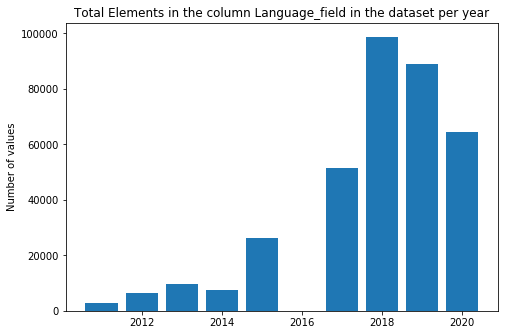

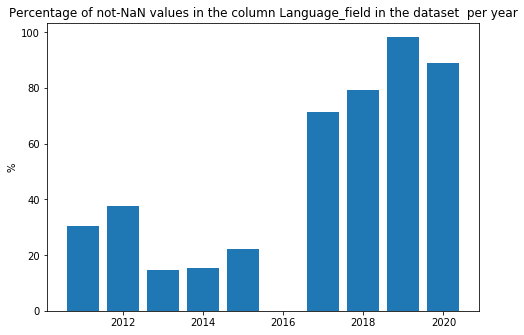

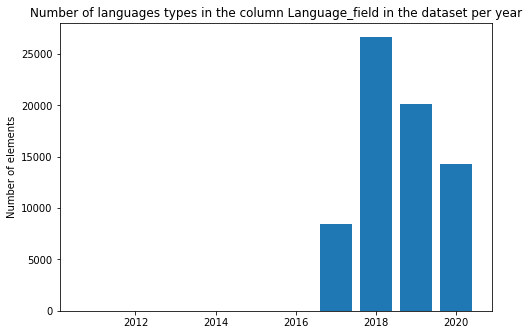

In [13]:
#---------------------------------------------------------------
# Show graphs with the statistic results of the 'Language_field'
#---------------------------------------------------------------
# Size of the dataset
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,all_total_elements)
plt.ylabel("Number of values")
plt.title("Total Elements in the column Language_field in the dataset per year")
plt.show()
       
# Percentage of NaN Values
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,all_perNotNaN)
plt.ylabel("%")
plt.title("Percentage of not-NaN values in the column Language_field in the dataset  per year")
plt.show()
          
# Number of languages types in the 'Language_field'
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(years,all_numTypeLanguage)
plt.ylabel("Number of elements")
plt.title("Number of languages types in the column Language_field in the dataset per year")
plt.show()


### 2.2. Analysis of the age_field

A similar analysis was implemented to verify the data structure of **age_field** of StakeOverflow's dataset from 2011 to 2020. 

In [14]:
years = np.linspace(2011,2020,2020-2011+1,dtype = 'int') # List with all the years under analysis

# Lists with statistical values of the field 'Language_field'
all_total_elements = []
all_perNotNaN = []
all_numTypeLanguage = []

for year in years:
    idx =  year - 2011;
    print('------------------------------------------------------------------------')
    print('Year ' + str(year))
    print("Reading csv file ': " + PathName  + FileNames[idx] + '.csv ...')
    
    perNotNaN = 0
    
    total_elements, perNotNaN, typeLanguage = analyse_raw_data_structure(df,age_field[idx],True)
    all_total_elements.append(total_elements)
    all_perNotNaN.append(perNotNaN)
    all_numTypeLanguage.append(len(typeLanguage))                             


------------------------------------------------------------------------
Year 2011
Reading csv file ': ./Dataset/2011 Stack Overflow Survey Results.csv ...
Total elements 2814
Percentage of not NaN values:  97.01 %
In this data field there is  9 types of language.
The types of language are:  ['20-24', '51-60', '25-29', '35-39', '40-50', '30-34', '>60', '< 20', 'Response']
------------------------------------------------------------------------
Year 2012
Reading csv file ': ./Dataset/2012 Stack Overflow Survey Results.csv ...
Total elements 6244
Percentage of not NaN values:  95.53 %
In this data field there is  9 types of language.
The types of language are:  ['20-24', '51-60', '25-29', '40-50', '35-39', '30-34', '>60', '< 20', 'Response']
------------------------------------------------------------------------
Year 2013
Reading csv file ': ./Dataset/2013 Stack Overflow Survey Responses.csv ...
Total elements 9743
Percentage of not NaN values:  96.84 %
In this data field there is  9 ty

From this brief data visualisation, it is possible to observe that **age_field** is also structured differently along the years. After 2019, **age_field** is composed of double values, whereas before 2019 **age_field** is structured as a string. 

Since the objective of analysing the participants' age is to identify the type of people ( or people's profile) who program a type of programming language, for the sake of simplicity, only the years 2019 and 2020 can be analysed.

Furthermore, no additional information would be added by parsing and assessing the data of previously years. The data that need to be parsed before evaluation are older (before 2019) than those that is easialy interpreted (after 2019).

## 3. Data preparation

After being awared of how the data of interest are structured, in this section, the data cleaning and data parsing will be implemented to prepare the dataset for analysis. 

To answer the three business questions, the analysis is divided into four steps:
1. Identify the most popular programming languages in the last year.
2. Identify the average and standard deviation of participants per type of programming language.
3. Identify the average salary per type of language using the dataset of 2017.
4. Identify the most valuable recommendation to start programming.

Notably, the steps 1, 2 and 3 are related to each order. To identify the most popular programming languages, it will be necessary to assign to each participant its programming language preference (step 1). Thereafter, for each type of language, it is needed to determine the average of all participants (step 2) and its correspondent salary for the dataset of 2017 (step 3).

Consequently, to tackle the four points mentionned above, two separate strategies were implemented. First, the identification of type of programming languages and participant's age. Secondly, the identification of participant's recommendataion to start programming. This two strategies will be implemented in following two subssections.



### 3.1. Identification of type of programming languages and participant's age

The objective is to identify and show the top ten programming languages most use the last years (from 2011 to 2020).

Therefore, it is first created a function **show_top_programming_languages** to retrieve and parse both the language programming of each year and participants age.

In the **show_top_programming_languages** it is implemented:

1. Find the unique types of languages present in the column **Language_field**.
    - This information will be useful to count the number of participants who have indicated a specific type of language as a preference.

2. Parse the data. 
    - Verify whether the language preference are structured in multiple or unique columns.  
    - Depending in how the data are structured, the data will be parsed differently.

3. Clean the data. 
    - NaN data were simply dropped because this the main information that is needed. The preference of programming type is almost impossible to be predicted with other data/columns in the dataset. Therefore, the drop of NaN values in the **Language_field** were implemented.
    
4. Calculate the frequency of each language type and the participant's age.
5. Sort the type of language according to its populaty.
6. Show the results.
     

In [35]:
def show_top_programming_languages(df,Language_field,age_field,year,isAnalyseSalary,top_number,show_results = False):
    '''
    INPUT 
        df - a dataframe holding 'Language_field' and 'age_field' columns
        year - a string refering to the year of the dataset survey. This string is used for prints and plots of results
        isAnalyseSalary - a boolean variable indicating whether the analysis of the Salary must be implemented or not.
        top_number - an integer variable indicating the number of top languages to be given in the output variables.
        show_results - a boolean variable incating whether the results are going to be shown or not.
    OUTPUT
        language_type_sorted_top - a string list with the 'top_number' programing languages most used recently
        language_frequency_sorted_top - a list of float variables with the frequecency of the most popular programming languages
        average_age_sorted_top -  a list of float variables with the average age of participants
        average_salary_sorted_top - a list of float with the salary of participants
        std_age_sorted_top - a list of float variables with the standard deviation of participant's age
    '''
    print('Parse language field...')

    #--------------------------------------------------------------
    # Step 1: Identification of unique type of programming language
    #--------------------------------------------------------------
    # Identify the column concerning the programming language
    language = df[Language_field]
    
    # Drop empty lines (the Drop is used because the objective here is to identify the different type of languages existent in the dataset)
    language = language.dropna(axis = 0)
  
    # Identify the type of languages used in a year
    All_languages = []
    for sublist in language.str.split(";",expand=False).values.tolist():
        for item in sublist:
            item = item.replace(" ", "")
            All_languages.append(item)
            
    language_type = list(set(All_languages)) # Select unique type of languages
    
    print("Number of type languages: " + str(len(language_type)))  

    
    #-----------------------------------------------------------------------
    # Step 2,3 and 4: Parse the data |Clean the data | Calculate the metrics 
    #-----------------------------------------------------------------------
    isCalculatedAge = False; # Boolean value indicating whether the participant's age were analysis or not.  
  
    # Calculate the frequency of each type of language
    if len(language_type) > top_number:
        # Data are structure in one column
        print("Data are structure in one column")
        
        # Inititialize list of the metrics to be calculated
        language_frequency =[]
        average_age = []
        average_salary = []
        std_age = []
        
        # Clean the dataset:
        #   Since the all data are structured in a unique column, the drop of NaN were adopted. 
        #   The objective is to identify the most used programming languages. Therefore, the participants who did not indicate the preference of programming language were discarted.
        df_clean = df.dropna(subset=[Language_field],axis = 0).reset_index()
       
        total_language_users = 0
        for language_type_ in language_type:
            language_frequency.append(All_languages.count(language_type_))
            # Count the number of participants that programming this language in the data set
            total_language_users = total_language_users + All_languages.count(language_type_)
            
            # Select the participants that use a specific programming language
            idx_language = df_clean[Language_field].str.contains(language_type_,regex=False)
            
            #-------------------   
            # Analyse the salary
            #-------------------
            if isAnalyseSalary:
                # Get the salary 
                df_Salary = df_clean[['Salary']]
                salary = df_Salary[idx_language]
                salary = salary.dropna(axis = 0).mean()[0]
                average_salary.append(salary);
            
            #-----------------------------
            # Analyse the age per language
            #-----------------------------
            
            # Get all participants' age
            if age_field != '':
                All_age = df_clean[age_field]
        
            if age_field != '':
                # Only the data that is easily interpreted (double format) will be analysed (2019 and 2020)
                # The drop of NaN values was addopted because the objective is to give an impression of the participant's age. The common workaround with the replacement of NaN values with the mean value will not affect the final result.
                try: 
                    age = All_age[idx_language]
                    age_mean = age.dropna(axis = 0).mean()
                    age_std = age.dropna(axis = 0).std()
                    average_age.append(age_mean)
                    std_age.append(age_std)
                    isCalculatedAge = True;
                except:
                    isCalculatedAge = False;

        # Calculate the percentages
        language_frequency_per = 100*np.asarray(language_frequency) / total_language_users
        print('Total language users: ', total_language_users)
    else:
        # Data are structured in multiple columns
        print("Data are structured in multiple columns")
        
        # Inititialize list of the metrics to be calculated
        language_type = []
        language_frequency = []
        average_age = []
        std_age = []
        
        column_language = df.columns.get_loc(Language_field);

        #-------------------------------------
        # Determine the most popular languages
        #-------------------------------------
        
        # Read the column containing the question
        language = df[Language_field]
        
        # Clean the dataset: The objective is to identify the most used programming languages. Therefore, the participants who did not indicate the preference of programming language were discarted.
        language = language.dropna(axis = 0)
        
        # Identify the type of language
        item = language[0].replace(" ", "")
        if len(item.split(':')) > 1:
            item = item.split(':')[1]
        language_type.append(item)
        
        # Calculate the frequency
        language_frequency.append(language.shape[0])
                
        count = 1
        total_language_users = language.shape[0]
        while "Unnamed" in df.columns[df.columns.get_loc(Language_field) + count]:
            # Read the colum
            language = df[df.columns[df.columns.get_loc(Language_field) + count]]
            
            # Clean the dataset: The objective is to identify the most used programming languages. Therefore, the participants who did not indicate the preference of programming language were discarted.
            language = language.dropna(axis = 0)
            
            # Identify the type of language
            # Parse the string
            item = language[0].replace(" ", "")
            if len(item.split(':')) > 1:
                item = item.split(':')[1]
            language_type.append(item)
        
            # Calculate the frequency
            language_frequency.append(language.shape[0])
                                                                              
            # Count the total elements in the data set
            total_language_users = total_language_users + language.shape[0]

            count = count + 1
 
        # Calculate the percentages
        language_frequency_per = 100*np.asarray(language_frequency) / total_language_users
        print('Total language users: ', total_language_users)
   
    #-----------------------------------------------------------------------
    # Step 5: Sort in decreasing order the most used programming language
    #-----------------------------------------------------------------------
    index_sort = np.argsort(language_frequency)
    language_type_sorted = []
    language_frequency_sorted = []
    average_age_sorted = []
    std_age_sorted = []
    average_salary_sorted = []
    
    for index in index_sort:
        language_type_sorted.append(language_type[index])
        language_frequency_sorted.append(language_frequency_per[index])
        if isCalculatedAge:
            average_age_sorted.append(average_age[index])
            std_age_sorted.append(std_age[index])
        if isAnalyseSalary:
            average_salary_sorted.append(average_salary[index])
            
    average_age_sorted_top = []
    std_age_sorted_top = []
    language_type_sorted_top = []
    average_salary_sorted_top = []
    if isAnalyseSalary:
            average_salary_sorted_top  = average_salary_sorted[-top_number:]
    
    #----------------------------------------------------
    # Step 6: Show frequency bar for the top "top_number"
    #----------------------------------------------------
    if show_results:
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        language_type_sorted_top = language_type_sorted[-top_number:]
        language_frequency_sorted_top = language_frequency_sorted[-top_number:]
        ax.bar(language_type_sorted[-top_number:],language_frequency_sorted[-top_number:])
        plt.ylabel("% of participants")
        plt.title('The five most popular programming language in ' + str(year))
        plt.show()

        if isCalculatedAge:
            fig = plt.figure()
            ax = fig.add_axes([0,0,1,1])
            language_type_sorted_top = language_type_sorted[-top_number:]
            average_age_sorted_top = average_age_sorted[-top_number:]
            std_age_sorted_top = std_age_sorted[-top_number:]
            ax.bar(language_type_sorted[-top_number:],average_age_sorted[-top_number:])
            plt.ylabel("Years")
            plt.title('Average age of participants in ' + str(year))
            plt.show()
        else:
            average_age_sorted_top = list(-1*np.ones(top_number))
            std_age_sorted_top = list(-1*np.ones(top_number))
        
        
    return language_type_sorted_top,language_frequency_sorted_top,average_age_sorted_top,average_salary_sorted_top,std_age_sorted_top

#### 3.1.1. Preparing the data and getting key informations
In this cell, all csv files will be analysed through the function **show_top_programming_languages**. Particularly, for the year 2017, the salary will be analysed according to the top programming languages.

------------------------------------------------------------------------
Year 2011
Reading csv file ': ./Dataset/2011 Stack Overflow Survey Results.csv ...
Analysing field Which languages are you proficient in?...
Parse language field...
Number of type languages: 1
Data are structured in multiple columns
Total language users:  10714


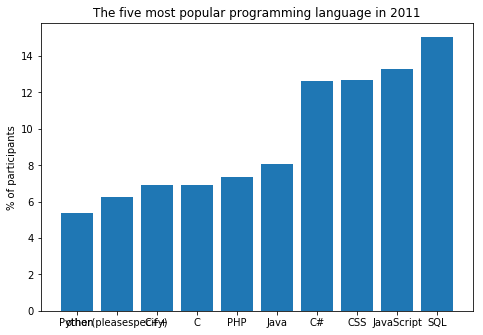

------------------------------------------------------------------------
Year 2012
Reading csv file ': ./Dataset/2012 Stack Overflow Survey Results.csv ...
Analysing field Which languages are you proficient in?...
Parse language field...
Number of type languages: 1
Data are structured in multiple columns
Total language users:  24894


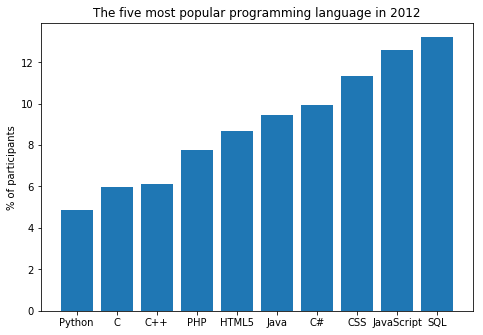

------------------------------------------------------------------------
Year 2013
Reading csv file ': ./Dataset/2013 Stack Overflow Survey Responses.csv ...
Analysing field Which of the following languages or technologies have you used significantly in the past year?...
Parse language field...
Number of type languages: 1
Data are structured in multiple columns
Total language users:  31318


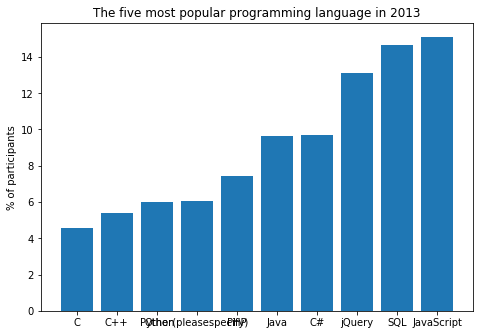

------------------------------------------------------------------------
Year 2014
Reading csv file ': ./Dataset/2014 Stack Overflow Survey Responses.csv ...
Analysing field Which of the following languages or technologies have you used significantly in the past year?...
Parse language field...
Number of type languages: 1
Data are structured in multiple columns
Total language users:  21201


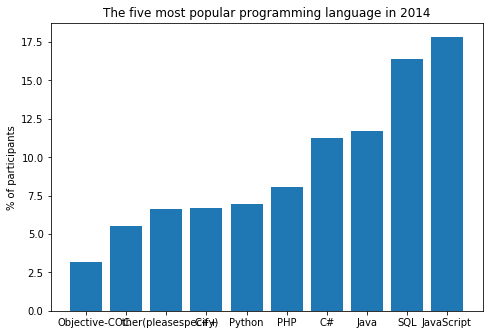

------------------------------------------------------------------------
Year 2015
Reading csv file ': ./Dataset/2015 Stack Overflow Developer Survey Responses.csv ...
Analysing field Select all that apply.1...
Parse language field...
Number of type languages: 2
Data are structured in multiple columns
Total language users:  98643


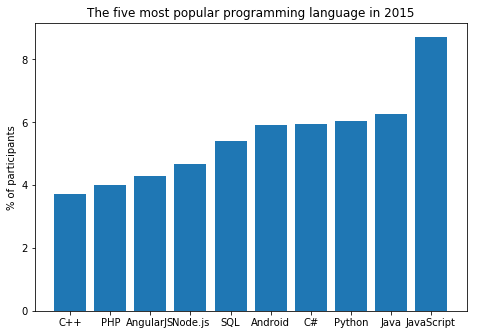

------------------------------------------------------------------------
Year 2016
Reading csv file ': ./Dataset/2016 Stack Overflow Survey Responses.csv ...
The field is empty! 
------------------------------------------------------------------------
Year 2017
Reading csv file ': ./Dataset/survey_results_public_2017.csv ...
Analysing field HaveWorkedLanguage...
Parse language field...
Number of type languages: 35
Data are structure in one column
Total language users:  138664


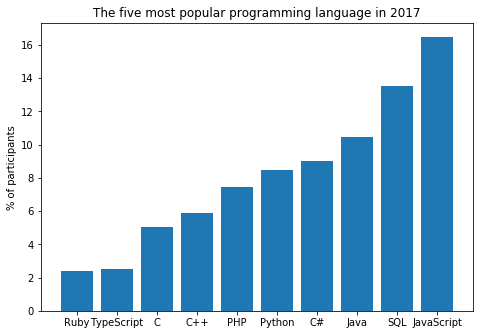

Analyse the salary per type of language programming.


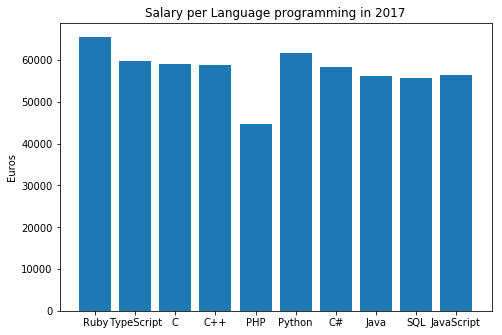

------------------------------------------------------------------------
Year 2018
Reading csv file ': ./Dataset/survey_results_public_2018.csv ...
Analysing field LanguageWorkedWith...
Parse language field...
Number of type languages: 38
Data are structure in one column
Total language users:  485668


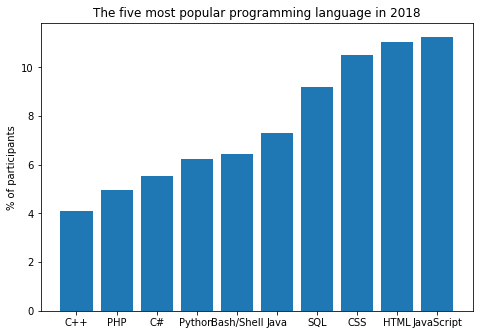

------------------------------------------------------------------------
Year 2019
Reading csv file ': ./Dataset/survey_results_public_2019.csv ...
Analysing field LanguageWorkedWith...
Parse language field...
Number of type languages: 28
Data are structure in one column
Total language users:  440505


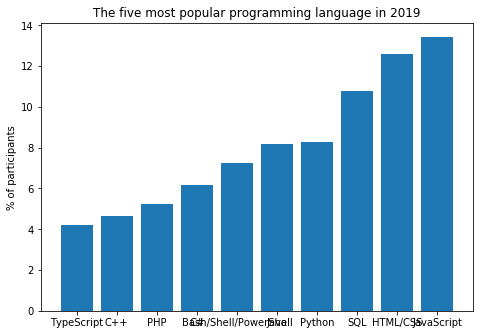

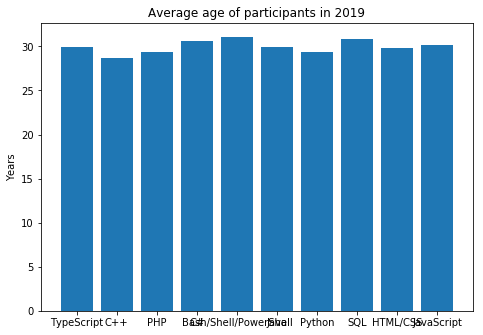

------------------------------------------------------------------------
Year 2020
Reading csv file ': ./Dataset/survey_results_public_2020.csv ...
Analysing field LanguageWorkedWith...
Parse language field...
Number of type languages: 25
Data are structure in one column
Total language users:  288004


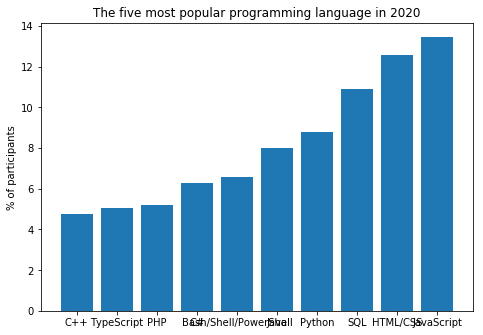

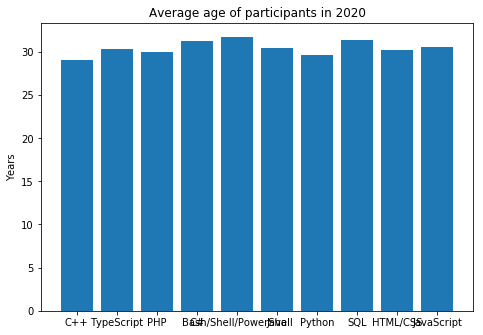

In [36]:
#-------------------------------
# Analyse data from 2011 to 2020
#-------------------------------
#years = [2017]
years = np.linspace(2011,2020,2020-2011+1,dtype = 'int') # List with all the years under analysis
all_language_frequency = []
all_language_type = []
all_year = []
all_average_age = []
all_std_age = []

top_number = 10
total_years_analysed = 0
for year in years:
    idx =  year - 2011;
    print('------------------------------------------------------------------------')
    print('Year ' + str(year))
    print("Reading csv file ': " + PathName  + FileNames[idx] + '.csv ...')
    df = pd.read_csv(PathName  + FileNames[idx] + '.csv',engine='python') # TODO: Uncomment it later
    
    #-----------------------------------------
    # Get the language programming information
    #-----------------------------------------
    if Language_field[idx] != '':
        total_years_analysed = total_years_analysed + 1
        print('Analysing field ' + Language_field[idx] + '...')
        if year == 2017:
            isAnalyseSalary = True
        else:
            isAnalyseSalary = False
        language_type,language_frequency,average_age,average_salary,std_age = show_top_programming_languages(df,Language_field[idx],age_field[idx],year,isAnalyseSalary,top_number,show_results = True)
        year_language = list(year*np.ones(top_number))
        for i in range(top_number):
            all_language_type.append(language_type[i])
            all_language_frequency.append(language_frequency[i])
            all_year.append(year_language[i])
            if len(average_age) > 0:
                all_average_age.append(average_age[i])
                all_std_age.append(std_age[i])
    else:
        string_ = []
        for i in range(top_number): string_.append(' ')
        language_type = list(string_)
        language_frequency = list(np.zeros(top_number))
        
        print('The field is empty! ')
    
    
    #-----------------------------------------------------------
    # Step 6: Show the Average salary based on the data of 2017
    #-----------------------------------------------------------
    if isAnalyseSalary == True:
        print('Analyse the salary per type of language programming.')
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(language_type,average_salary)
        plt.ylabel("Euros")
        plt.title('Salary per Language programming in ' + str(year))
        plt.show()
        language_type_2017 = language_type
        average_salary_2017 = average_salary
        
    

In the cell below, the programming languages that were among the most used ones during all years being analysing (2011 to 2020) will be identified. 

The objective is to show the evolutioin of the popularity of the most used programming languages along the years.

In [54]:
# Structure the data in a DataFrame
d = {'Frequency': all_language_frequency, 'Year': all_year,'Language':all_language_type}
df_languages_most_used = pd.DataFrame(data=d)

# Group by type of language and count the number of times it appears in the top 10
df_languages_most_used = df_languages_most_used.groupby('Language').count()

# Get the top 10 programming language that persisted along the years in the top 10
df_languages_most_used = df_languages_most_used.nlargest(10, 'Frequency').reset_index()

# Get the languages that are most used and that is present in the top 10 in all years analysed
df_languages_most_used = df_languages_most_used[df_languages_most_used.Frequency >= total_years_analysed]
languages_most_used = list(df_languages_most_used.Language)

print('The programming languages that are most used in last 10 years and that is available in all years analysed are: ', languages_most_used )
df_languages_most_used

The programming languages that are most used in last 10 years and that is available in all years analysed are:  ['C#', 'C++', 'Java', 'JavaScript', 'PHP', 'Python', 'SQL']


Language  Frequency  Year
0          C#          9     9
1         C++          9     9
2        Java          9     9
3  JavaScript          9     9
4         PHP          9     9
5      Python          9     9
6         SQL          9     9

## 4. Analysing results

### 4.1.  The most popular languages in the last years
For each programming language most used in the last years, it will be verified the percentage of participants that use this type of language along the last years.

Text(0.5, 1.0, 'The programming languages most used in the last years')

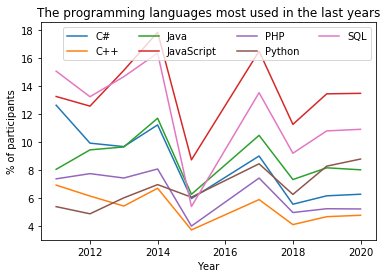

In [55]:
# Create the DataFrame
d = {'Frequency': all_language_frequency, 'Year': all_year,'Language':all_language_type}
df_languages_most_used = pd.DataFrame(data=d)

# Plot the frequency vs year
for i in range(len(languages_most_used)):
    df_temp = df_languages_most_used[df_languages_most_used.Language == languages_most_used[i]]
    plt.plot(list(df_temp.Year),list(df_temp.Frequency))   
plt.legend(languages_most_used,loc='upper right',ncol=4)
plt.ylabel("% of participants")
plt.xlabel("Year")
plt.title("The programming languages most used in the last years")

### 4.2.  Salary per type of programming language
Based on the dataset of 2017, it will be analysed the average salary according to the type of language.

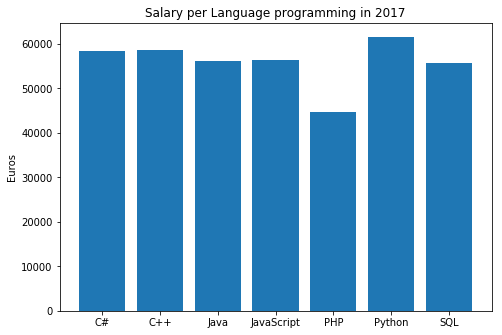

In [66]:
#-----------------------------------------
# Average salary based on the data of 2017
#-----------------------------------------
# Create the DataFrame
d = {'Salary': average_salary_2017, 'Language':language_type_2017}
df_salary_of_most_popular = pd.DataFrame(data=d)

# Plot the frequency vs year
salary = []

for i in range(len(languages_most_used)):
    for j in range(len(language_type_2017)):
        if languages_most_used[i] == language_type_2017[j]:
            salary.append(average_salary_2017[j])

    
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(languages_most_used,salary)
plt.ylabel("Euros")
plt.title('Salary per Language programming in 2017')
plt.show()


In [27]:
df_salary_of_most_popular

Salary    Language
0  65581.261691        Ruby
1  59623.008951  TypeScript
2  59000.873434           C
3  58690.262754         C++
4  44780.664854         PHP
5  61641.073324      Python
6  58305.499895          C#
7  56094.376711        Java
8  55663.308207         SQL
9  56396.922706  JavaScript

### 4.2. The age of people who use a type of programming language

In [67]:
# Create the DataFrame
d = {'Age': all_average_age, 'Language':all_language_type,'Std': all_std_age}
df_age = pd.DataFrame(data=d)

# Get only the age that is greater than 0. In the data parsing and cleaning, the dataset that was not analysed, the age of participants was assigned to zero. Therefore, we are interested in only the years that the data were retrieved and treated correctly.
df_age = df_age[df_age.Age>0]

# Calculate the average age per type of language
df_age = df_age.groupby('Language').mean().reset_index()

# Calculate the standard deviation per type of language
df_age[df_age['Language'].isin(languages_most_used)]


Language        Age        Std
1          C#  30.945740   9.429103
2         C++  28.854407  10.226767
4        Java  30.176540   8.909255
5  JavaScript  30.330979   8.836665
6         PHP  29.699456   9.009861
7      Python  29.481224   9.243356
8         SQL  31.054672   9.225886

### 4.2. Recommendations to start programming

This section aims to analyse the data of 2017 to identify the recommendations to start programming.

For that, a brief data visualisation is provided in the column **CousinEducation**.

The data information/values and a bar graph showing the frequency of type recommendations are shown below.


In [37]:
# Data of 2017
df = pd.read_csv(PathName  + FileNames[6] + '.csv',engine='python') 
 
cous_ed_vals = df.CousinEducation.value_counts()#Provide a pandas series of the counts for each CousinEducation status
cous_ed_vals # assure this looks right



Take online courses; Buy books and work through the exercises                                                                                711
Take online courses                                                                                                                          551
None of these                                                                                                                                523
Take online courses; Part-time/evening courses; Buy books and work through the exercises                                                     479
Take online courses; Bootcamp; Part-time/evening courses; Buy books and work through the exercises                                           465
Other                                                                                                                                        403
Return to college; Take online courses; Part-time/evening courses; Buy books and work through the exercises                       

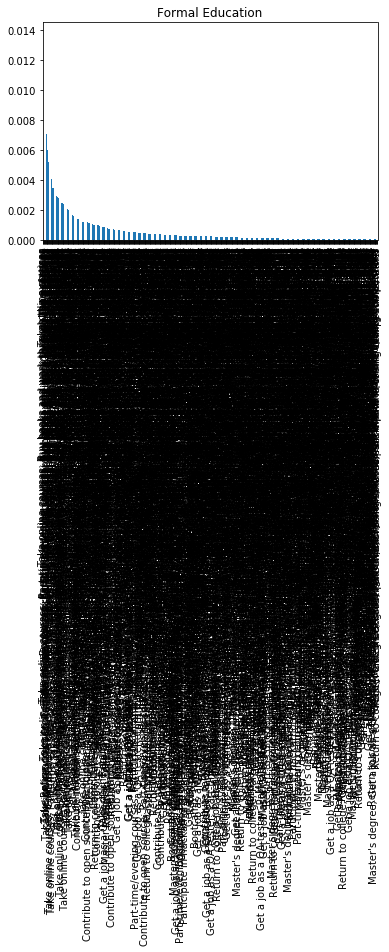

In [38]:
(cous_ed_vals/df.shape[0]).plot(kind="bar");
plt.title("Formal Education");

As can be noted, the visualisation of the data is not clear. There are many types of recommendations that is not very relevant.

Therefore, to better visualise the data, only the 13 most recommending approaches will be shown. This filtering was implementely manually, by creating the list of strings **possible_vals**.

In order to count the number of times a specific recommendation was mentionned by a participant, the function **total_count** was used.

In [79]:
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]

    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up
    '''
    new_df = defaultdict(int)
    #loop through list of ed types
    for val in look_for:
        #loop through rows
        for idx in range(df.shape[0]):
            #if the ed type is in the row add 1
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

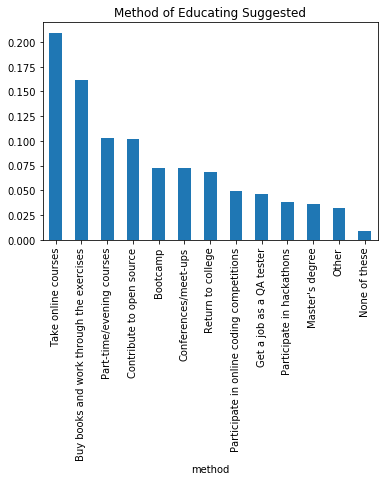

In [80]:
possible_vals = ["Take online courses", "Buy books and work through the exercises", 
                 "None of these", "Part-time/evening courses", "Return to college",
                 "Contribute to open source", "Conferences/meet-ups", "Bootcamp",
                 "Get a job as a QA tester", "Participate in online coding competitions",
                 "Master's degree", "Participate in hackathons", "Other"]

def clean_and_plot(df, title='Method of Educating Suggested', plot=True):
    '''
    INPUT 
        df - a dataframe holding the CousinEducation column
        title - string the title of your plot
        axis - axis object
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        study_df - a dataframe with the count of how many individuals
        Displays a plot of pretty things related to the CousinEducation column.
    '''
    study = df['CousinEducation'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'CousinEducation': 'count'}, inplace=True)
    study_df = total_count(study, 'method', 'count', possible_vals)

    study_df.set_index('method', inplace=True)
    if plot:
        (study_df/study_df.sum()).plot(kind='bar', legend=None);
        plt.title(title);
        plt.show()
    props_study_df = study_df/study_df.sum()
    return props_study_df

# Data of 2017
df = pd.read_csv(PathName  + FileNames[6] + '.csv',engine='python') # TODO: Uncomment it later
    
props_df = clean_and_plot(df)

From the above graph, it is possible to note that taking online courses and buying books are the most recommended approaches to start learning a new programming language.

## 5. Conclusions

By using the CRISDM process, this Jupiter notebook aims to identify the most suitable programming language to start learning in order to adapt to the fast digital transformation that we have been living. The society has changed, consequently the requirements of professionals for future jobs have also been modified.

Therefore, the popularity of the programming languages along the last ten years was analysed. From this analysis, it was constated that Python has become an important type of programming language, being increasiangly more popular and well-paied.

After recognised which programming language would be valuabe to be proficient in, it was analysed how to start learning it. Based on the StakeOverflow survey of 2017, it was analysed the recommendation of participants to be proficient in software development. It was concluded that attending online courses and practicing exercises of a book are the most recommended methods to start programming.

The key results of this analysis are also available in [this story](https://daniyamashita.medium.com/how-to-integrate-into-the-fast-digital-transformation-6f4df8856be1) in Medium.